#Comparacion de trayectos

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Posgrado/data/yellow_taxi/null_filtered_sampled_data_2020_2019_02_03_04.parquet')

In [ ]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
1,2019-02-06 10:01:07,2019-02-06 10:05:03,1.0,0.54,263,236,1,4.5,0.0,0.5,1.56,0.0,0.3,9.36,2,2019,3.933333
2,2019-02-11 12:37:17,2019-02-11 12:47:41,2.0,1.41,236,75,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2,2019,10.400000
3,2019-02-19 22:37:11,2019-02-19 22:47:26,1.0,2.10,164,141,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2,2019,10.250000
4,2019-02-21 15:31:37,2019-02-21 15:54:16,1.0,3.26,249,87,1,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2,2019,22.650000
6,2019-02-01 00:58:37,2019-02-01 00:59:32,1.0,0.27,170,170,1,3.0,0.5,0.5,1.29,0.0,0.3,5.59,2,2019,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596845,2020-04-25 15:46:48,2020-04-25 15:54:26,1.0,1.75,43,233,1,8.0,0.0,0.5,0.00,0.0,0.3,11.30,4,2020,7.633333
1596846,2020-04-16 11:12:46,2020-04-16 11:25:21,1.0,2.10,140,163,1,11.0,2.5,0.5,2.85,0.0,0.3,17.15,4,2020,12.583333
1596848,2020-04-30 01:48:23,2020-04-30 01:56:34,1.0,2.40,239,230,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,4,2020,8.183333
1596849,2020-04-11 12:05:59,2020-04-11 12:14:03,1.0,1.94,262,43,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,4,2020,8.066667


In [268]:
df_comb = pd.DataFrame()
df_comb["year"]=df.year
df_comb["month"]=df.month
df_comb["time_id"] = df["year"].astype(str)+df["month"].astype(str)
df_comb["PU_DO"] = df["PULocationID"].astype(str)+"-"+df["DOLocationID"].astype(str)

Creamos una columna que se llama "time_id" que se compone del dato year y month para hacer mas sencillo el ordenado de los datos.

In [294]:
conteo =df_comb.value_counts(sort=False)
cont = conteo.index.to_frame(index=False)
cont["trips_num"] = conteo.values

In [272]:
cont

,year,month,time_id,PU_DO,trips_num
0,2019,2,20192,1-1,17
1,2019,2,20192,10-10,2
2,2019,2,20192,10-107,2
3,2019,2,20192,10-114,1
4,2019,2,20192,10-130,2
...,...,...,...,...,...
50834,2020,4,20204,97-52,1
50835,2020,4,20204,97-61,1
50836,2020,4,20204,97-66,1
50837,2020,4,20204,97-9,1


Se puede observar que existen 50.839 trayectorias distintas, pero hay un gran numero de trayectorias poco frecuentes, por ejemplo, si tomaramos las 15.000 trayectorias mas frecuentes (menos del 30% de las trayectorias totales)

In [273]:
a = cont.sort_values(["trips_num"], ascending=[False]).head(15000)
a.trips_num.sum()

1064132

Estariamos contemplando 1.064.132 viajes (93% de los viajes totales)

In [274]:
c = pd.DataFrame(pd.unique(a["PU_DO"])).head(12)

In [279]:
width = 0.35
x_labels = np.array(['Febrero', 'Marzo', 'Abril'])

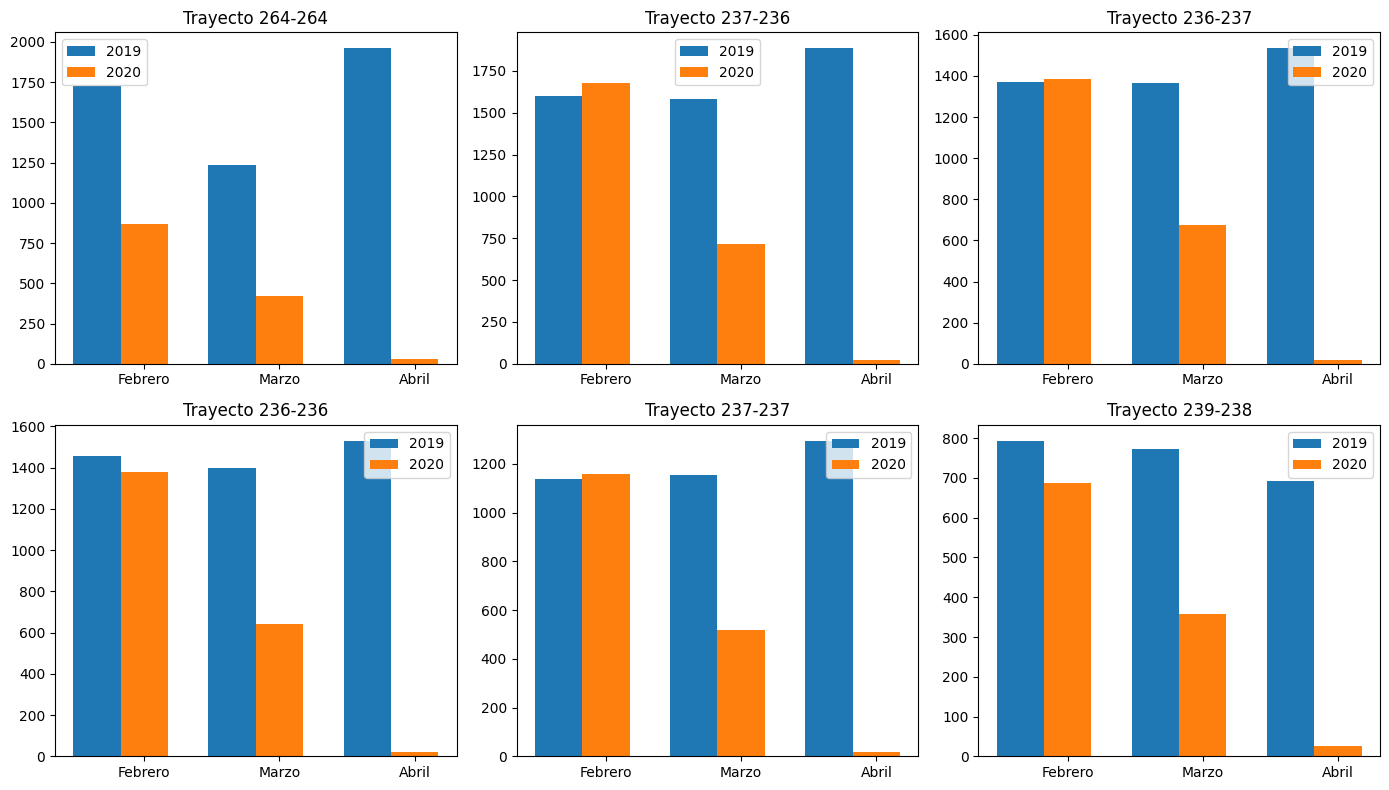

In [281]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14,8))


for i, ax in enumerate(axs.flatten(), start=0):

    ind = np.arange(3)
    datos_actual = cont[cont['PU_DO'] == c.loc[i,0]]
    datos_actual.reset_index(inplace=True)
    ax.bar(ind - width, datos_actual.trips_num[ind], width=width, label="2019", tick_label=x_labels)
    ax.bar(ind, datos_actual.trips_num[ind+3], width=width, label="2020", tick_label=x_labels)
    ax.set_title(f"Trayecto {c.loc[i,0]}")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


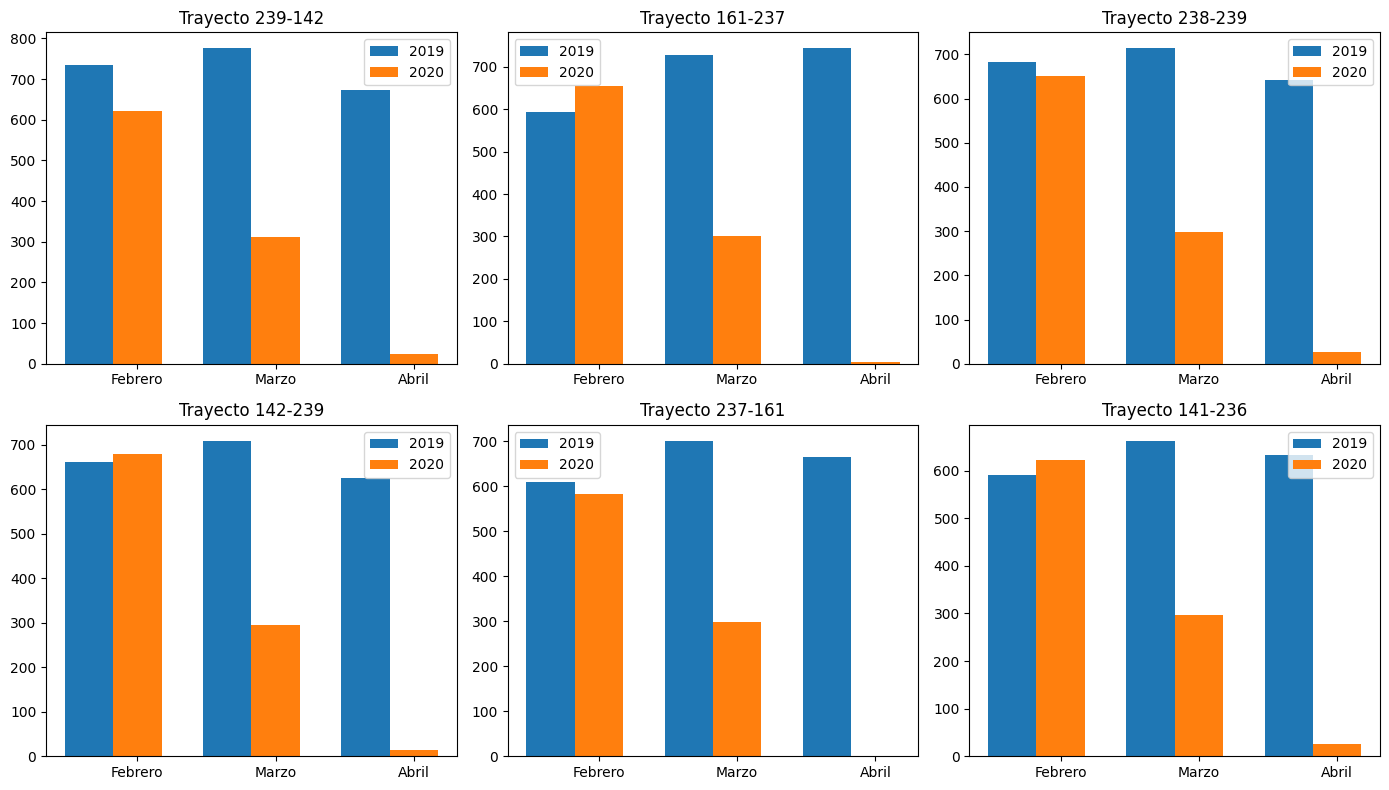

In [282]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14,8))


for i, ax in enumerate(axs.flatten(), start=6):

    ind = np.arange(3)
    datos_actual = cont[cont['PU_DO'] == c.loc[i,0]]
    datos_actual.reset_index(inplace=True)
    ax.bar(ind - width, datos_actual.trips_num[ind], width=width, label="2019", tick_label=x_labels)
    ax.bar(ind, datos_actual.trips_num[ind+3], width=width, label="2020", tick_label=x_labels)
    ax.set_title(f"Trayecto {c.loc[i,0]}")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


Ahora si queremos ver las trayectorias mas frecuentes en Marzo y Abril 2019

In [291]:
marzo_19 = cont[cont['time_id']=="20193"]
mf_marzo_19 = marzo_19.sort_values(["trips_num"], ascending=[False])
mf_marzo_19.head(10)

,year,month,time_id,PU_DO,trips_num
17568,2019,3,20193,237-236,1579
17427,2019,3,20193,236-236,1397
17428,2019,3,20193,236-237,1365
19110,2019,3,20193,264-264,1232
17569,2019,3,20193,237-237,1155
17776,2019,3,20193,239-142,776
17825,2019,3,20193,239-238,773
14168,2019,3,20193,161-237,728
17697,2019,3,20193,238-239,714
13154,2019,3,20193,142-239,709


In [293]:
abril_19 = cont[cont['time_id']=="20194"]
mf_abril_19 = abril_19.sort_values(["trips_num"], ascending=[False])
mf_abril_19.head(10)

,year,month,time_id,PU_DO,trips_num
29888,2019,4,20194,264-264,1961
28398,2019,4,20194,237-236,1886
28268,2019,4,20194,236-237,1535
28267,2019,4,20194,236-236,1531
28399,2019,4,20194,237-237,1296
25326,2019,4,20194,161-237,744
28641,2019,4,20194,239-238,693
28591,2019,4,20194,239-142,673
28361,2019,4,20194,237-161,664
28362,2019,4,20194,237-162,660


Evaluando las trayectorias mas frecuentes en Marzo y Abril 2020

In [295]:
marzo_20 = cont[cont['time_id']=="20203"]
mf_marzo_20 = marzo_20.sort_values(["trips_num"], ascending=[False])
mf_marzo_20.head(10)

,year,month,time_id,PU_DO,trips_num
45724,2020,3,20203,237-236,716
45621,2020,3,20203,236-237,674
45620,2020,3,20203,236-236,643
45725,2020,3,20203,237-237,517
46767,2020,3,20203,264-264,423
45931,2020,3,20203,239-238,357
43636,2020,3,20203,161-236,314
45893,2020,3,20203,239-142,311
43637,2020,3,20203,161-237,301
45691,2020,3,20203,237-161,298


In [300]:
abril_20 = cont[cont['time_id']=="20204"]
mf_abril_20 = abril_20.sort_values(["trips_num"], ascending=[False])
mf_abril_20.head(10)

,year,month,time_id,PU_DO,trips_num
48992,2020,4,20204,140-263,33
50182,2020,4,20204,262-140,31
50285,2020,4,20204,264-264,30
50231,2020,4,20204,263-141,29
50265,2020,4,20204,263-263,28
49894,2020,4,20204,236-75,28
50230,2020,4,20204,263-140,28
49978,2020,4,20204,238-239,27
49977,2020,4,20204,238-238,26
49047,2020,4,20204,141-236,26


Unificando los datos en una sola tabla por mes para tener una mejor comparacion

In [305]:
head = 20

marzo_19_20 = pd.DataFrame()
marzo_19_20["2019_PU_DO"] = mf_marzo_19.PU_DO.head(head).values
marzo_19_20["2019_trips_num"] = mf_marzo_19.trips_num.head(head).values
marzo_19_20["2020_PU_DO"] = mf_marzo_20.PU_DO.head(head).values
marzo_19_20["2020_trips_num"] = mf_marzo_20.trips_num.head(head).values

In [309]:
head = 20

abril_19_20 = pd.DataFrame()
abril_19_20["2019_PU_DO"] = mf_abril_19.PU_DO.head(head).values
abril_19_20["2019_trips_num"] = mf_abril_19.trips_num.head(head).values
abril_19_20["2020_PU_DO"] = mf_abril_20.PU_DO.head(head).values
abril_19_20["2020_trips_num"] = mf_abril_20.trips_num.head(head).values

Marzo

In [306]:
marzo_19_20

,2019_PU_DO,2019_trips_num,2020_PU_DO,2020_trips_num
0,237-236,1579,237-236,716
1,236-236,1397,236-237,674
2,236-237,1365,236-236,643
3,264-264,1232,237-237,517
4,237-237,1155,264-264,423
5,239-142,776,239-238,357
6,239-238,773,161-236,314
7,161-237,728,239-142,311
8,238-239,714,161-237,301
9,142-239,709,237-161,298


Se observa que a pesar que hay un cambio notorio en la frecuencia de viajes, se mantienen de forma general los mismos trayectos con leves diferencias en los ordenes, pero se mantiene la tendencialidad de los mismos trayectos.

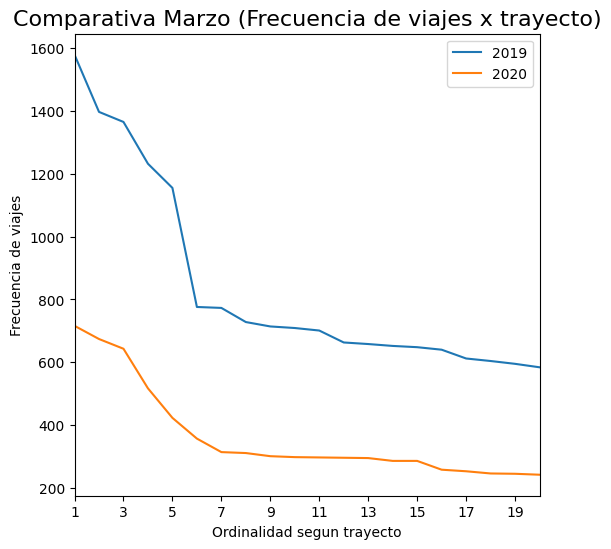

In [374]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(marzo_19_20.index+1, marzo_19_20["2019_trips_num"],label="2019")
ax.plot(marzo_19_20.index+1, marzo_19_20["2020_trips_num"],label="2020")
ax.set(xlim=(1, 20))
ax.set_xticks(range(1,20,2))
ax.set_xlabel('Ordinalidad segun trayecto')
ax.set_ylabel('Frecuencia de viajes')
ax.set_title("Comparativa Marzo (Frecuencia de viajes x trayecto)", fontsize=16)
ax.legend(loc='best')
plt.show()

Tambien se mantiene cierta tendencia aunque con magnitud menor, se comporta en terminos generales de la misma forma.

Abril

In [310]:
abril_19_20

,2019_PU_DO,2019_trips_num,2020_PU_DO,2020_trips_num
0,264-264,1961,140-263,33
1,237-236,1886,262-140,31
2,236-237,1535,264-264,30
3,236-236,1531,263-141,29
4,237-237,1296,263-263,28
5,161-237,744,236-75,28
6,239-238,693,263-140,28
7,239-142,673,238-239,27
8,237-161,664,238-238,26
9,237-162,660,141-236,26


En cambio en Abril, cambia totalmente los trayectos mas frecuentes, en donde aparecen nuevos trayectos pero sin tener una relevancia notable sobre los otros trayectos a diferencia del año 2019.

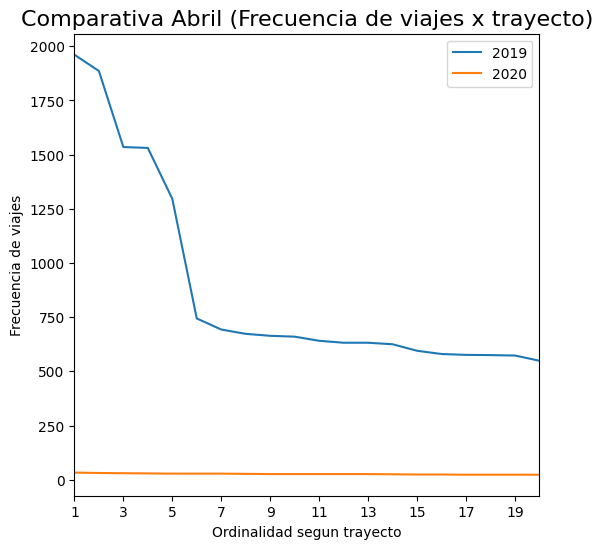

In [375]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(abril_19_20.index+1, abril_19_20["2019_trips_num"],label="2019")
ax.plot(abril_19_20.index+1, abril_19_20["2020_trips_num"],label="2020")
ax.set(xlim=(1, 20))
ax.set_xticks(range(1,20,2))
ax.set_xlabel('Ordinalidad segun trayecto')
ax.set_ylabel('Frecuencia de viajes')
ax.set_title("Comparativa Abril (Frecuencia de viajes x trayecto)", fontsize=16)
ax.legend(loc='best')
plt.show()

En la grafica se observa que el orden de magnitud de la frecuencia de viajes es totalmente distinta, en el 2020 ya se nota el lockdown en donde los viajes en taxi fueron casi nulos en comparacion al año anterior, ademas tomando en cuenta que se esta observando los trayectos mas frecuentes que incluso no se mantienen para el año 2020 ya que se ha distorsionado por completo el transporte en dicha fecha.